### C S 329E HW 4

## Pair Programming Group Number: 22
## Members of Team: Marissa Green

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [2]:
df = pd.read_csv('melb_tree_train.csv')
df_X = df.loc[:, df.columns != 'Type']
s_y = df["Type"]

## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [3]:
# calc_entropy(s_y) definition
def calc_entropy(s_y): 
    p_zero = s_y.value_counts(normalize=True)[0]
    p_one = s_y.value_counts(normalize=True)[1]
    p_two = s_y.value_counts(normalize=True)[2]
    
    return - p_zero*log2(p_zero) - p_one*log2(p_one) - p_two*log2(p_two)

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [4]:
# The entire data set
calc_entropy(s_y)

1.582533311426178

In [5]:
# Less than or equal to 200
# sort dataframe based on landsize so i can partition it into the three ranges
df_sorted = df.sort_values(by = ["Landsize"], axis=0)

# send over the s_y associated with landsize [0,200]
landsize_1 = df_sorted.loc[(df_sorted['Landsize'] > 0) & (df_sorted['Landsize'] <= 200)] # get rows for when landsize is [0,200]
landsize_1_type = landsize_1["Type"] # send over type column for those rows
calc_entropy(landsize_1_type)

1.3977725338275824

In [6]:
# Between 200 and 450
landsize_2 = df_sorted.loc[(df_sorted['Landsize'] > 200) & (df_sorted['Landsize'] <= 450)] # get rows for when landsize is [0,200]
landsize_2_type = landsize_2["Type"] # send over type column for those rows
calc_entropy(landsize_2_type)

1.4660501816027975

In [7]:
# greater than 450
landsize_3 = df_sorted.loc[(df_sorted['Landsize'] > 450)] # get rows for when landsize is [0,200]
landsize_3_type = landsize_3["Type"] # send over type column for those rows
calc_entropy(landsize_3_type)

1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [8]:
def calc_gini(s_y):
    p_zero = s_y.value_counts(normalize=True)[0]
    p_one = s_y.value_counts(normalize=True)[1]
    p_two = s_y.value_counts(normalize=True)[2]
    
    gini = 1 - p_zero**2 - p_one**2 - p_two**2
    
    return gini

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [9]:
# The entire data set
calc_gini(s_y)

0.6655601280292637

In [10]:
# Less than or equal to 200
calc_gini(landsize_1_type)

0.5786025602368355

In [11]:
# Between 200 and 450
calc_gini(landsize_2_type)

0.6101021682602731

In [12]:
# greater than 450
calc_gini(landsize_3_type)

0.4381934171597633

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Create Tree
decision_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# one hot encoding on CouncilArea
df_X_dummies = pd.concat([df_X,pd.get_dummies(df_X["CouncilArea"])], axis = 1) # add in dummy columns
df_X_dummies = df_X_dummies.drop(['CouncilArea', "Yarra"], axis=1) # remove old "CouncilArea" column
decision_tree = decision_tree.fit(df_X_dummies, s_y)

In [20]:
# irrelvant, just checking
from sklearn.datasets import load_iris
iris = load_iris()
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
# Display text version of the tree

# corrected, adds feature names into tree
feature_names = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Banyule', 'Bayside', 'Boroondara',
       'Brimbank', 'Darebin', 'Glen Eira', 'Hobsons Bay', 'Hume', 'Kingston',
       'Knox', 'Manningham', 'Maribyrnong', 'Melbourne', 'Monash',
       'Moonee Valley', 'Moreland', 'Port Phillip', 'Stonnington',
       'Whitehorse', 'Wyndham']
text_tree = tree.export_text(decision_tree, feature_names = feature_names)
print(text_tree)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



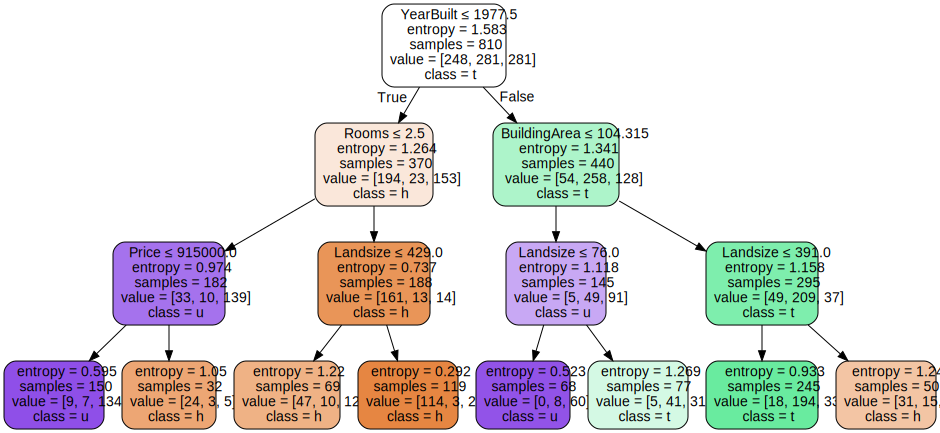

In [16]:
# Display graphviz version of the tree
graph_tree = tree.export_graphviz(decision_tree, out_file=None, class_names=decision_tree.classes_, feature_names = df_X_dummies.columns,
                                 filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(graph_tree)
graph

➡️ Answer containing your descriptive analytics in markdown here ⬅️

Units and duplexes (class = u) are classified as having lower prices and landsizes. Houses, cottages, villas, semis, and terraces (class = h) are classified as having the highest landsize, while townhosues (class = t) falls in between class = u and class = h. 

Class = h places have more rooms than class = u places (which makes sense because that's probably associated with a greater landsize). Class = t has greater building area than class = u. Class = h places are usually built area than class = t places. 

The council area, scraped number of bedrooms, number of bathrooms, distance to city center, and number of carspots weren't used as splits, meaning they didn't produce the highest gain in purity because they weren't as informative for predicting type of place as year built, landsize, number of bedrooms, price, and building area. 

In general, the etropy doesn't get much smaller as more levels are being made, meaning the purity of each node isn't getting much smaller through the levels. This leads me to believe more levels need to occur to truly make a difference in classification. 

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [17]:
# Load in the test data
df_test = pd.read_csv('melb_tree_test.csv')

df_test_dummies = pd.concat([df_test,pd.get_dummies(df_test["CouncilArea"])], axis = 1) # add in dummy columns
df_test_dummies = df_test_dummies.drop(['CouncilArea', "Yarra"], axis=1) # remove old "CouncilArea" column

df_test_X = df_test_dummies.loc[:, df_test_dummies.columns != 'Type']
df_test_y = df_test_dummies["Type"]

In [18]:
# Build the trees using the training data
z = np.arange(2,16) # array of #s from 2 to 15

# arrays for errors
train_error_entropy = []
test_error_entropy = []
train_error_gini = []
test_error_gini = []

# entropy
for i in z:
    decision_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    decision_tree = decision_tree.fit(df_X_dummies, s_y)
    
    train_error_entropy.append(1 - decision_tree.score(df_X_dummies, s_y))
    test_error_entropy.append(1 - decision_tree.score(df_test_X, df_test_y))

# gini
for i in z:
    decision_tree = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)
    decision_tree = decision_tree.fit(df_X_dummies, s_y)
    
    train_error_gini.append(1 - decision_tree.score(df_X_dummies, s_y))
    test_error_gini.append(1 - decision_tree.score(df_test_X, df_test_y))

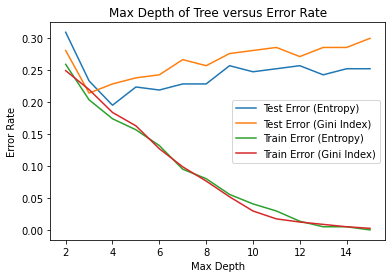

In [19]:
# Plot the 4 learning curves
plt.plot(z, test_error_entropy) # Test error (entropy)
plt.plot(z, test_error_gini) # Test error (gini index)
plt.plot(z, train_error_entropy) # Train error (entropy)
plt.plot(z, train_error_gini) # Train error (gini index)

plt.xlabel("Max Depth")
plt.ylabel("Error Rate")
plt.title("Max Depth of Tree versus Error Rate")
plt.legend(("Test Error (Entropy)","Test Error (Gini Index)", "Train Error (Entropy)", "Train Error (Gini Index)"))
plt.show()